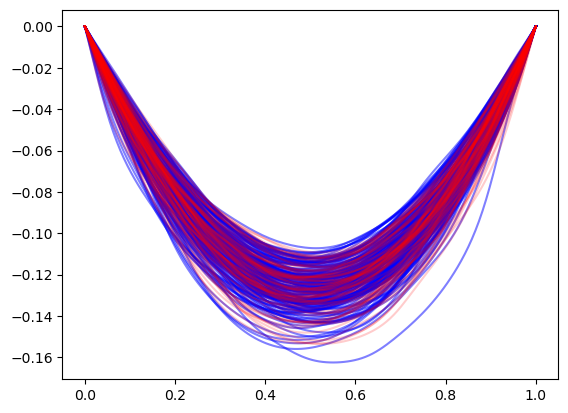

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

datafile = 'data/ell0.1_d15_n2048_ksigma0.316.npz'
data = np.load(datafile)

x = torch.tensor(data['x'], dtype=torch.float32)
u_data = torch.tensor(data['u_sols'], dtype=torch.float32).T
n_total = u_data.shape[0]
n_train = 256
n_val = int(n_train * 0.3)
n_train = n_train - n_val
u_train = u_data[:n_train]
u_val = u_data[n_train:n_train+n_val]

plt.figure()
plt.plot(x, u_train.T, color='blue', alpha=0.5)
plt.plot(x, u_val.T, color='red', alpha=0.2)

In [5]:
class CustomNetwork(nn.Module):
    def __init__(self, layers, activation):
        super(CustomNetwork, self).__init__()
        self.layers = layers
        self.activation = activation
        self.fc_layers = nn.ModuleList()

        # Create fully connected layers
        for i in range(len(layers) - 1):
            self.fc_layers.append(nn.Linear(layers[i], layers[i+1]))
            if i < len(layers) - 2:
                self.fc_layers.append(activation)

    def forward(self, x):
        for layer in self.fc_layers:
            x = layer(x)
        return x

model = CustomNetwork([128, 128, 128, 128, 128], nn.Tanh())

torch.Size([180, 128])